In [36]:
# import test_tensor_2d as tt ttbd
import quimb.tensor as qtn
import quimb as qu
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

import spinlessQubit as sq
import hubbardAnalyt as han

In [119]:
reload(han)
triv = han.FermiHubbardSpinless(Lx=1, Ly=2)
triv.build_spinless_ham(t=0, V=0, mu=1)
trivH = triv._Ham
print(trivH)
print(qu.partial_trace(trivH, dims=triv._dims, keep=[0] ) ) 

[[ 0.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -2.]]
[[-1.  0.]
 [ 0. -3.]]


In [294]:
reload(han)

T_PARAM=1
V_PARAM=0
MU_PARAM=0
LX,LY = 2,3
hub = han.FermiHubbardSpinless(Lx=LX, Ly=LY)
hub.build_spinless_ham(t=T_PARAM, V=V_PARAM, mu=MU_PARAM)
Hex = hub._Ham
gex, gsx = qu.eigh(Hex)


Lx,Ly = hub._shape

Nk = [qu.ikron(han.number_op(), hub._dims, [site]) 
        for site in hub._V_ind.flatten()]


WHICH = 0

n_ij = np.real(np.array([qu.expec(Nk[k], gsx[:,WHICH])
        for k in range(Lx*Ly)]).reshape(Lx,Ly))

print(gex[0:5])
print(n_ij)


# plt.imshow(n_ij)
# plt.colorbar()

[-4.53430603 -3.92468142 -3.92468142 -2.44948974 -2.44948974]
[[0.5 0.5 0.5]
 [0.5 0.5 0.5]]


[-3.96238861 -3.82842712 -3.65128079 -3.65128079 -3.41421356]
[[0.5 0.5 0.5]
 [0.5 0.5 0.5]]
[0.5]


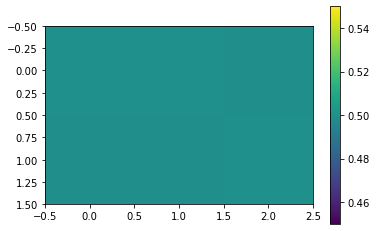

In [295]:
reload(sq)

sql = sq.SpinlessQubitLattice(Lx=LX,Ly=LY)
sql.make_spinless_Hubbard(t=T_PARAM, V=V_PARAM, mu=MU_PARAM)
ge, gs = sql.eigspectrum()

nv, nf = sql.stateLocalOccs(k=0)

print(ge[0:5])

print(nv)

plt.imshow(nv)
plt.colorbar()

print(nf)


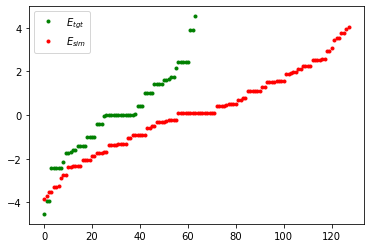

In [297]:
plt.plot(gex, 'g.', label=r'$E_{tgt}$')
# plt.plot(ge1, 'y.')
# plt.plot(ge3, 'y.')
plt.plot(ge+0.1, 'r.',label=r'$E_{sim}$')
plt.legend()

[-4.47213595 -4.47213595 -4.47213595 -4.47213595 -3.23606798]
[[0.00000000e+00 5.00000000e-01 5.00000000e-01]
 [4.09570164e-66 5.00000000e-01 5.00000000e-01]]


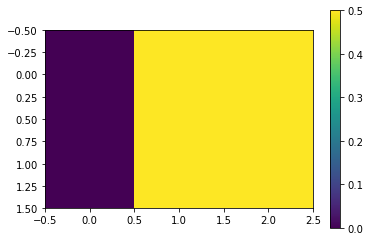

In [296]:
# print(np.array_equal(sql.retrieve_tgt(1), sql.retrieve_tgt(2)))# True!

h1 = sql.retrieve_tgt(1)
ge1,gs1 = qu.eigh(h1)
# h3 = sql.retrieve_tgt(2)
# ge3,gs3 = qu.eigh(h3)
print(ge1[0:5])

Nfcc = sql.siteNumberOps(sites=sql.vertexInds(), fermi=True)
n_loc = np.real(np.array([qu.expec(Nfcc[j], gs1[:,0])
                        for j in sql.vertexInds()]))
n_loc = np.reshape(n_loc, sql._shape)
print(n_loc)
plt.imshow(n_loc)
plt.colorbar()






In [44]:
import qubitLattice as ql
from importlib import reload
reload(ql)

qq=ql.QubitLattice()
qq.build_spin_Hubbard()


MemoryError: Unable to allocate 4.00 GiB for an array with shape (16384, 16384) and data type complex128